# Bootcamp - 7IA

INTEGRANTES
1. Leonardo Tozo Bisinoto – RM: 334513
2. Mauro Batina Rorato – RM: 335029
3. Pedro Lucas da Silva Junior – RM: 334544
4. Raynner Dourado Matos – RM: 335024

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from scipy import stats
from scipy.spatial import distance

In [230]:
dataset_1 = pd.read_csv('Dataset-1.csv', encoding='utf-8')
dataset_3 = pd.read_csv('Dataset-3.csv', encoding='utf-8')
dataset_1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Id,Idade,EstadoCivil,BillingCity,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,...,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo,Status,ProdutoId
0,0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHNKB5GXhV/iqGi4K,30,M,Aracruz,1.0,1.0,2,1300.0,6000.0,...,30.0,NaN,Renda Fixa,30.0,NaN,0.0,0.37005375,1.0,Efetivada,a0W6A000009GZdgUAG
1,1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQcvloiuSPbG0TpW,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,150.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
2,2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQcvloiuSPbG0TpW,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,50.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
3,3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQcvloiuSPbG0TpW,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,60.0,NaN,0.0,0.13178136,1.0,Efetivada,a0W6A000009GZdgUAG
4,4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQcvloiuSPbG0TpW,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,40.0,NaN,0.0,0.15076414,1.0,Efetivada,a0W6A000009GZdgUAG


In [231]:
dataset_1.columns

Index(['Unnamed: 0', 'Id', 'Idade', 'EstadoCivil', 'BillingCity',
       'NivelConhecimentoAtual', 'ScoreNivelConhecimento', 'PerfilInvestidor',
       'RendaMensal', 'ValorPatrimonio', 'Pergunta1', 'Resposta11',
       'Pergunta2', 'Resposta21', 'Pergunta3', 'Resposta31', 'Pergunta4',
       'Resposta41', 'Pergunta5', 'Resposta51', 'Resposta52', 'Resposta53',
       'Resposta54', 'Resposta55', 'Resposta56', 'Resposta57', 'Resposta58',
       'Pergunta6', 'Resposta61', 'Resposta62', 'Resposta63', 'Resposta64',
       'Resposta65', 'Resposta66', 'Resposta67', 'Resposta68', 'Pergunta7',
       'Resposta71', 'Resposta72', 'Resposta73', 'Resposta74', 'Resposta75',
       'Pergunta8', 'Resposta81', 'Pergunta9', 'Resposta91', 'ScoreRisco',
       'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'Produto', 'NomeDoProduto',
       'NomeEmissor', 'TaxaCliente', 'TaxaPreCliente', 'DescricaoProduto',
       'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional',
       'DataVencimento', 'Familia

In [232]:
dataset_1[['NivelConhecimentoAtual', 'ScoreNivelConhecimento', 'PerfilInvestidor',
       'RendaMensal', 'ValorPatrimonio','ScoreRisco',
       'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'Produto', 'NomeDoProduto',
       'NomeEmissor', 'TaxaCliente', 'TaxaPreCliente', 'DescricaoProduto',
       'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional',
       'DataVencimento', 'FamiliaCarteira', 'ValorInvestidoAtual',
       'ValorRendimento', 'Rentabilidade12Meses', 'RentabilidadeMes',
       'RiscoAtivo', 'Status']].describe()

,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,ScoreRisco,ScoreObjetivos,ScoreSituacaoFinanceira,TaxaCliente,TaxaPreCliente,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RiscoAtivo
count,34956.000000,37577.000000,38102.000000,3.810200e+04,2.565000e+04,37577.000000,37577.000000,37577.000000,5614.000000,5615.000000,22746.000000,30929.000000,36483.000000,5421.000000,30861.000000,36476.000000
mean,2.480804,2.533678,2.779959,8.368189e+03,9.122847e+05,2.671874,3.141815,2.124252,98.189526,0.413389,744.188094,360.480540,4046.749768,196.936554,9.666901,2.615309
std,1.522709,1.538015,1.121397,2.754596e+04,1.498490e+07,1.109866,1.176798,1.012600,26.149983,1.776756,2344.743320,1032.730307,17034.380766,748.580640,18.926591,1.532361
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.693346,0.000000
25%,1.000000,1.000000,2.000000,2.000000e+03,4.000000e+04,2.000000,2.000000,1.000000,94.000000,0.000000,30.000000,30.000000,40.000000,7.490000,0.000000,1.000000
50%,2.000000,2.000000,3.000000,4.200000e+03,2.000000e+05,3.000000,3.000000,2.000000,101.000000,0.000000,30.000000,30.000000,300.000000,28.080000,0.000000,2.000000
75%,4.000000,4.000000,4.000000,1.000000e+04,7.000000e+05,3.000000,4.000000,3.000000,113.000000,0.000000,500.000000,100.000000,2000.000000,103.750000,11.122177,4.000000
max,5.000000,5.000000,5.000000,2.400000e+06,1.500000e+09,5.000000,5.000000,5.000000,140.000000,12.000000,50000.000000,30000.000000,800000.000000,16834.210000,584.324863,5.000000


##### Distrubição das pessoas entre os diferentes scores de conhecimento e perfis de investimento:

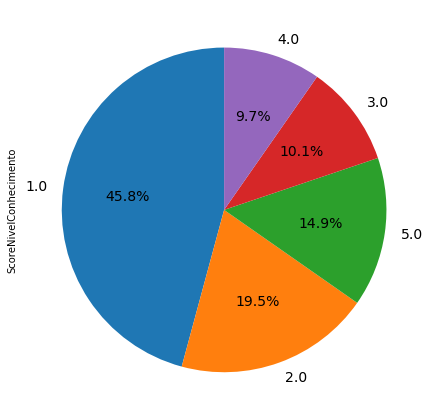

In [233]:
pie = dataset_1.drop_duplicates('Id').ScoreNivelConhecimento.value_counts()
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)

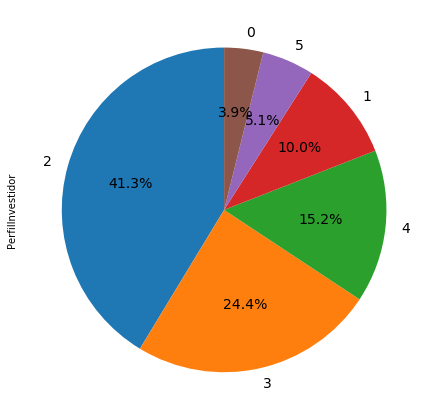

In [234]:
pie = dataset_1.drop_duplicates('Id').PerfilInvestidor.value_counts()
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)

##### Verificando o comportamento da rentabilidade de 12 meses:

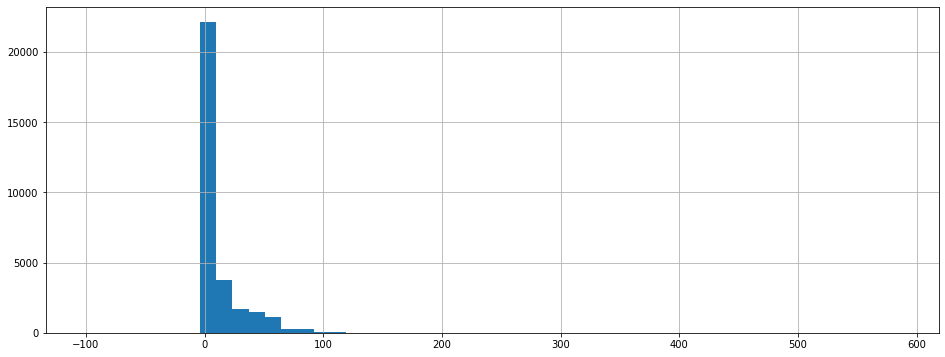

In [235]:
dataset_1['Rentabilidade12Meses'].hist(bins=50,figsize=(16,6))

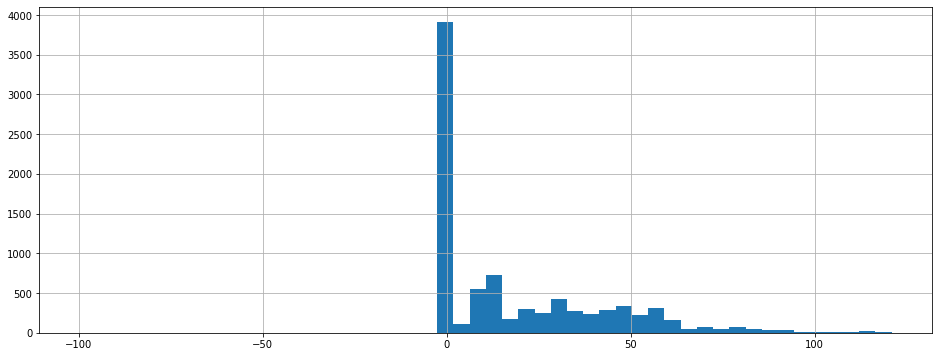

In [236]:
dataset_1['Rentabilidade12Meses'][(dataset_1.ScoreNivelConhecimento > 3) & (dataset_1.Rentabilidade12Meses < 150)].hist(bins=50,figsize=(16,6))

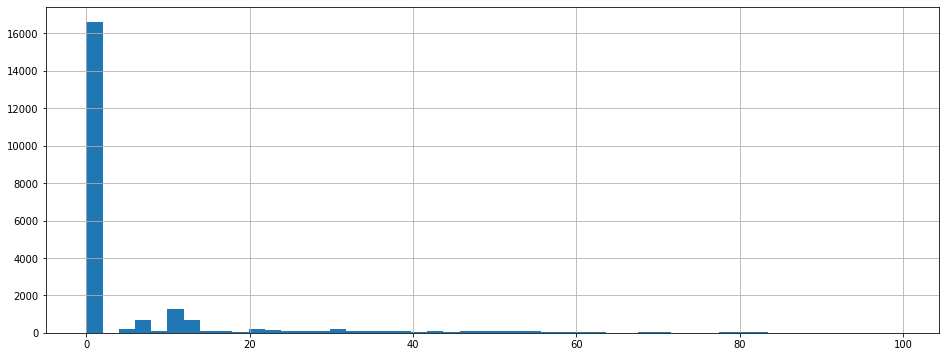

In [237]:
dataset_1['Rentabilidade12Meses'][(dataset_1.ScoreNivelConhecimento <= 3) & (dataset_1.Rentabilidade12Meses < 100)].hist(bins=50,figsize=(16,6))

Com os histogramas temos um primeiro indicativo que o grupo com maior conhecimento possuem rentabilidades maiores que os demais

### Hipóteses a serem testadas:

###### H0: Pessoas com score maior possuem a mesma rentabilidade  média  dos demais
###### H1: Pessoas com score maior não possuem a mesma  rentabilidade média dos demais

Iremos comparar a rentabilidade média dos clientes com score maior (4 e 5) com a média dos demais usando Teste t para a diferença entre Médias Amostrais. Estamos pressupondo que esse datatset é uma amostra aleatória de toda base de dados da Empresa. 

In [238]:
score_maior = dataset_1['Rentabilidade12Meses'][(dataset_1.ScoreNivelConhecimento > 3) & (dataset_1.Rentabilidade12Meses.notnull())]
len(score_maior) 

8712

In [239]:
score_menor = dataset_1['Rentabilidade12Meses'][(dataset_1.ScoreNivelConhecimento <= 3) & (dataset_1.Rentabilidade12Meses.notnull())]\
.sample(n=len(score_maior), random_state=100)
len(score_menor) #garantir que as amostras tenham mesmo tamanho

8712

In [240]:
print('Média do grupo de melhor score: ',score_maior.mean())
print('Média do grupo de menor score: ',score_menor.mean())

Média do grupo de melhor score:  18.760621518509996
Média do grupo de menor score:  6.0488254629844045


Podemos observar que a média do grupo grupo com melhor score é superior, mas verifiquemos se essa diferença é estatisticamente relevante com um intervalo de confiança de 95%:

In [241]:
var_score_maior = score_maior.var(ddof=1)
var_score_menor = score_menor.var(ddof=1)

In [242]:
s = np.sqrt((var_score_maior + var_score_menor)/2) # Desvio Padrão
t = (score_maior.mean() - score_menor.mean())/(s*np.sqrt(2/len(score_maior)))  # Calculando estatistica t
gl = 2*len(score_maior) - 2 # Graus de Liberdade

In [243]:
p = 1 - stats.t.cdf(t,df=gl)

In [244]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 42.44813890938526
p = 0.0


Como p < 0.05 podemos rejeitar H0 e determinar que as médias de rentabilidade são distintas

In [245]:
t2, p2 = stats.ttest_ind(score_maior,score_menor)
print("t = " + str(t2))
print("p = " + str(p2))

t = 42.44813890938543
p = 0.0


Usando a função pronta da biblioteca scipy obtemos o mesmo resultado

###### H0: Pessoas com score maior não possuem aplicações com melhores rentabilidades
###### H1: Pessoas com score maior possuem aplicações com melhores rentabilidades

Iremos comparar a média de rentabilidade dos clientes com score maior (4 e 5)  com a média de um grupo de mesmo tamanho escolhido aleatoriamente. 

In [246]:
len(score_maior)

8712

In [247]:
random = dataset_1['Rentabilidade12Meses'][(dataset_1.Rentabilidade12Meses.notnull())].sample(n=score_maior.count(), random_state=100)
len(random)

8712

In [248]:
print('Média do grupo de melhor score: ',score_maior.mean())
print('Média do grupo aleatório: ',random.mean())

Média do grupo de melhor score:  18.760621518509996
Média do grupo aleatório:  9.714912584896718


Usando o mesmo o mesmo método anterior, verifiquemos se esta diferença tambem é estatisticamente relevante com um intervalo de confiança de 95%:

In [249]:
t2, p2 = stats.ttest_ind(score_maior,random)
print("t = " + str(t2))
print("p = " + str(p2))

t = 27.320032014609694
p = 5.9486448134001715e-161


Como a média do grupo de melhor score é maior que o aleatório e p valor é menor que 0.05 rejeitamos H0

### Conclusão:

Com os dois testes concluimos que o grupo com melhores scores (4 e 5) possuem rendimentos superiores.

### Sugestões de aplicação:

Uma vez que os grupos com melhores score possuem melhores rendimentos, usaremos suas carteiras como sugestões para os demais clientes. As sugestões serão feitas com base na proximidade entre cada pessoa no grupo com menor score e pessoas com score maior. Primeiro estratificando por PerfilInvestidor para que não sejam oferecidos carteiras com perfis distintos e depois aproximando por RendaMensal e ValorPatromonio. Com isto pessoas com Renda mensal e Patrimonio próximos vão poder usufruir dos mesmo rendimentos que seus equivalentes com mais experiência.

Removendo os valores nulos e duplicados (o datasets está no nivel de produto e precisamos somente uma pessoa por linha)

In [250]:
dataset_not_null = dataset_1[['Id','Rentabilidade12Meses','PerfilInvestidor','RendaMensal','ValorPatrimonio',"ScoreNivelConhecimento"]].dropna().drop_duplicates('Id').copy()


Como trabalharemos com a distânncia é  importante normalizar os dados. Para isso usamos o Max como 1 e o Min como 0, preservando assim as distribuições 

In [251]:
dataset_not_null["RendaMensal"] = MaxAbsScaler().fit_transform(np.array(dataset_not_null.RendaMensal).reshape(-1, 1))
dataset_not_null["ValorPatrimonio"] = MaxAbsScaler().fit_transform(np.array(dataset_not_null.ValorPatrimonio).reshape(-1, 1))

Separamos as pessoas em dois grupos com maior score (4 ou 5) e pessoas com menor score (1, 2 e 3)

In [252]:
score_maior = dataset_not_null.loc[dataset_not_null["ScoreNivelConhecimento"] > 3]
score_menor = dataset_not_null.loc[dataset_not_null["ScoreNivelConhecimento"] <= 3]

Estratificamos cada grupo em três faixas de acordo com a variavel 'PerfilInvestidor', para que assim só sejam oferecidas sugestões para pessoas com o mesmo perfil.

In [253]:
score_maior_conservador = score_maior.loc[(score_maior["PerfilInvestidor"] == 1) | (score_maior["PerfilInvestidor"] == 2)]
score_maior_moderado = score_maior.loc[(score_maior["PerfilInvestidor"] == 3) | (score_maior["PerfilInvestidor"] == 4)]
score_maior_arrojado = score_maior.loc[score_maior["PerfilInvestidor"] == 5]

score_menor_conservador = score_menor.loc[(score_menor["PerfilInvestidor"] == 1) | (score_menor["PerfilInvestidor"] == 2)]
score_menor_moderado = score_menor.loc[(score_menor["PerfilInvestidor"] == 3) | (score_menor["PerfilInvestidor"] == 4)]
score_menor_arrojado = score_menor.loc[score_menor["PerfilInvestidor"] == 5]

Cruzamos cada grupo menor com o seu equivalente de maior score, para assim termos na mesma linha as variavies 'RendaMensal','ValorPatrimonio' de cada grupo.

In [254]:
score_conservador = score_menor_conservador.assign(foo=1).merge(score_maior_conservador.assign(foo=1), on = 'foo', suffixes=('_menor', '_maior')).drop('foo', 1)
score_moderado = score_menor_moderado.assign(foo=1).merge(score_maior_moderado.assign(foo=1), on = 'foo', suffixes=('_menor', '_maior')).drop('foo', 1)
score_arrojado = score_menor_arrojado.assign(foo=1).merge(score_maior_arrojado.assign(foo=1), on = 'foo', suffixes=('_menor', '_maior')).drop('foo', 1)

In [255]:
score_conservador.index = pd.MultiIndex.from_product((score_menor_conservador.Id, score_maior_conservador.Id))
score_moderado.index = pd.MultiIndex.from_product((score_menor_moderado.Id, score_maior_moderado.Id))
score_arrojado.index = pd.MultiIndex.from_product((score_menor_arrojado.Id, score_maior_arrojado.Id))

Agora calculamos a distância euclidiana de cada pessoa nos grupos de score menor com CADA individuo no grupo equivalente de maior score. Essa etapa leva alguns minutos...

In [256]:
score_conservador_dist = score_conservador.apply(lambda row: distance.euclidean((row["RendaMensal_menor"], row["ValorPatrimonio_menor"]), (row["RendaMensal_maior"], row['ValorPatrimonio_maior'])),axis=1)
score_moderado_dist = score_moderado.apply(lambda row: distance.euclidean((row["RendaMensal_menor"], row["ValorPatrimonio_menor"]), (row["RendaMensal_maior"], row['ValorPatrimonio_maior'])),axis=1)
score_arrojado_dist = score_arrojado.apply(lambda row: distance.euclidean((row["RendaMensal_menor"], row["ValorPatrimonio_menor"]), (row["RendaMensal_maior"], row['ValorPatrimonio_maior'])),axis=1)

Escolhemos para cada pessoa no grupo de menor score as CINCO pessoas mais próximas, e portanto mais semelhantes, com seu nivel de Renda e Patrimônio.

In [257]:
score_conservador_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2",0]].head(10)

,level_0,level_2,0
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeryRG1d8S1xINuVq0/2m/zOoUaFpFViq,0.000007
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,$2b$10$.DCvvJ9WSDpqVP2xXjeSPemW350qVAdpz4r2mL4odBRXYdzoYrcKG,0.000198
2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe3Rqm/NJAm1kIW7GHZ5MPFPeFRAYNAG.,0.000489
3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeXdA5DzZd.ug0.MhArMrDDK6d5t0tLJq,0.000667
4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeCN7A45.RjbvBapvlC80bI1CvnlZV04O,0.000835
5,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPemW350qVAdpz4r2mL4odBRXYdzoYrcKG,0.000150
6,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeryRG1d8S1xINuVq0/2m/zOoUaFpFViq,0.000198
7,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe3Rqm/NJAm1kIW7GHZ5MPFPeFRAYNAG.,0.000443
8,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeXdA5DzZd.ug0.MhArMrDDK6d5t0tLJq,0.000713
9,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeB.SpIzrYBbFR5rxVAGpvSLexXMcQATu,0.000800


In [258]:
conservadores = score_conservador_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2"]]

In [259]:
score_moderado_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2",0]].head(10)

,level_0,level_2,0
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.3yqTnMb16SYnUAVuI4NC7FIooV.tba,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeV1moS8G3hMP0G3yjl.z8AV76qchDUmm,0.000000e+00
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.3yqTnMb16SYnUAVuI4NC7FIooV.tba,$2b$10$.DCvvJ9WSDpqVP2xXjeSPexDkNKQnNj16R/Be8ik/NCgu97.J8/.y,0.000000e+00
2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.3yqTnMb16SYnUAVuI4NC7FIooV.tba,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeDNsmKHwjxqBvt9y4J6nNfV5F5fBZdD2,6.666667e-06
3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.3yqTnMb16SYnUAVuI4NC7FIooV.tba,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeV2C.CgIiWeK0clzvegZh6aQ0relBRXC,6.666667e-06
4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.3yqTnMb16SYnUAVuI4NC7FIooV.tba,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe26cJP.tNNqRi9krCtZKsXNlTVgqZHWe,6.666667e-06
5,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeY53EEsGSWyLqYJ9huhqS0OZabd6FJNC,0.000000e+00
6,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeJUK/IVa4dY37pKpXcsKf0ss4zdpCPOO,6.673333e-07
7,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe6elB5iITCk.VcbdFMTg0rVDKWsCRF/.,2.000000e-06
8,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe3tXSxTACX6/HeK6UBdLJaPUEeDGFJZW,6.000000e-06
9,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeiOI9Gaa/ORvaeQTyQlA0VVFEFNspJz2,6.666667e-06


In [260]:
moderados = score_moderado_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2"]]

In [261]:
score_arrojado_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2",0]].head(10)

,level_0,level_2,0
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe2eoBICLq7z/BzTMDqI1attOiaZHkHbq,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeyJHvHIRMByOxlLJ3.FmgWkwj5NXlCtS,3.333333e-07
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe2eoBICLq7z/BzTMDqI1attOiaZHkHbq,$2b$10$.DCvvJ9WSDpqVP2xXjeSPen5xC6O9vclN4UU6GqtIjDrTe7oVizj6,2.433333e-05
2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe2eoBICLq7z/BzTMDqI1attOiaZHkHbq,$2b$10$.DCvvJ9WSDpqVP2xXjeSPem4IlMzRaejcxBTNVTNAtaZt1NYjnYjy,5.000111e-05
3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe2eoBICLq7z/BzTMDqI1attOiaZHkHbq,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeo1CJXpFRMVbUfTQ85oPqL1lvAwdBq2u,8.333933e-05
4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe2eoBICLq7z/BzTMDqI1attOiaZHkHbq,$2b$10$.DCvvJ9WSDpqVP2xXjeSPePlJs0BzjLEDmDiqf3Ae81709c1LMnHK,8.335000e-05
5,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,$2b$10$.DCvvJ9WSDpqVP2xXjeSPefsTcdoxtYy3r9G1I8ajHuRQDRiFUTBG,2.083376e-05
6,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,$2b$10$.DCvvJ9WSDpqVP2xXjeSPem4IlMzRaejcxBTNVTNAtaZt1NYjnYjy,1.375065e-04
7,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeoF5T4hvUreedCkcPef2bNI729Wu2DMe,1.460488e-04
8,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe13qL1IYyV1x4.CCAelvOlR67WKyj9nq,1.463262e-04
9,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeyJHvHIRMByOxlLJ3.FmgWkwj5NXlCtS,1.875047e-04


In [262]:
arrojados = score_arrojado_dist.groupby(level=0).nsmallest(5).reset_index()[["level_0","level_2"]]

Checando algumas pessoas para verificar se o algoritmo funcionou:

In [263]:
dataset_1[["Id","ScoreNivelConhecimento","PerfilInvestidor",'RendaMensal',"ValorPatrimonio"]]\
[(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y") |\
(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPefsTcdoxtYy3r9G1I8ajHuRQDRiFUTBG") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPem4IlMzRaejcxBTNVTNAtaZt1NYjnYjy") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeyJHvHIRMByOxlLJ3.FmgWkwj5NXlCtS")\
].drop_duplicates()

,Id,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio
535,$2b$10$.DCvvJ9WSDpqVP2xXjeSPefsTcdoxtYy3r9G1I8ajHuRQDRiFUTBG,4.0,5,400.0,2200.0
10599,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe5tyCLI8yy/Mvq/.sR/yZOw3We1tVx0y,2.0,5,350.0,2000.0
20252,$2b$10$.DCvvJ9WSDpqVP2xXjeSPem4IlMzRaejcxBTNVTNAtaZt1NYjnYjy,5.0,5,680.0,4000.0
35141,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeyJHvHIRMByOxlLJ3.FmgWkwj5NXlCtS,4.0,5,800.0,4000.0


In [264]:
dataset_1[["Id","ScoreNivelConhecimento","PerfilInvestidor",'RendaMensal',"ValorPatrimonio"]]\
[(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2") |\
(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeY53EEsGSWyLqYJ9huhqS0OZabd6FJNC") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeJUK/IVa4dY37pKpXcsKf0ss4zdpCPOO") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeiOI9Gaa/ORvaeQTyQlA0VVFEFNspJz2")\
].drop_duplicates()

,Id,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio
4975,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe.5yNe1vv8BDJqijet6xP4o19Ci.S3/2,3.0,3,3500.0,15000.0
20066,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeiOI9Gaa/ORvaeQTyQlA0VVFEFNspJz2,4.0,3,3500.0,25000.0
32587,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeY53EEsGSWyLqYJ9huhqS0OZabd6FJNC,5.0,3,3500.0,15000.0
36760,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeJUK/IVa4dY37pKpXcsKf0ss4zdpCPOO,4.0,3,3500.0,13999.0


In [265]:
dataset_1[["Id","ScoreNivelConhecimento","PerfilInvestidor",'RendaMensal',"ValorPatrimonio"]]\
[(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2") |\
(dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeryRG1d8S1xINuVq0/2m/zOoUaFpFViq") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPe3Rqm/NJAm1kIW7GHZ5MPFPeFRAYNAG.") |\
 (dataset_1.Id == "$2b$10$.DCvvJ9WSDpqVP2xXjeSPeXdA5DzZd.ug0.MhArMrDDK6d5t0tLJq")\
].drop_duplicates()

,Id,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio
1512,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,1.0,1,1950.0,300000.0
1705,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe3Rqm/NJAm1kIW7GHZ5MPFPeFRAYNAG.,4.0,2,3000.0,400000.0
6644,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeryRG1d8S1xINuVq0/2m/zOoUaFpFViq,4.0,2,2000.0,5000.0
26675,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeXdA5DzZd.ug0.MhArMrDDK6d5t0tLJq,4.0,2,3600.0,14000.0


Os perfis parecem proximos, a distância funcionou para estes casos (a aproximação também vai depedender a disponibilidade de perfis no grupo com maior score para aproximar).

Obtemos os investimentos que estas cinco pessoas proximas possuem:

In [266]:
conservadores = conservadores.rename(columns={"level_2": "Id", "level_0": "Main"}).merge(dataset_1[["Id","ProdutoId","NomeDoProduto"]], how='left')\
.merge(dataset_3[["ProdutoId","DescricaoAtivo__c"]],how='left')
moderados = moderados.rename(columns={"level_2": "Id", "level_0": "Main"}).merge(dataset_1[["Id","ProdutoId","NomeDoProduto"]], how='left')\
.merge(dataset_3[["ProdutoId","DescricaoAtivo__c"]],how='left')
arrojados = arrojados.rename(columns={"level_2": "Id", "level_0": "Main"}).merge(dataset_1[["Id","ProdutoId","NomeDoProduto"]], how='left')\
.merge(dataset_3[["ProdutoId","DescricaoAtivo__c"]],how='left')

Para o usuário '$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO' seriam oferecido os seguintes produtos:

In [267]:
pd.set_option('display.max_colwidth', 200)
conservadores[["ProdutoId","NomeDoProduto","DescricaoAtivo__c"]][conservadores.Main =='$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO'].drop_duplicates()

,ProdutoId,NomeDoProduto,DescricaoAtivo__c
0,a0W6A000008FwYQUA0,SAM JURO REAL RF FIC FI,"O FUNDO tem por objetivo investir em ativos financeiros e/ou modalidades operacionais de renda fixa que busquem acompanhar as variações do Índice de Mercado ANBIMA IMA-B 5, por meio da aplicação d..."
1,a0W6A000009GZdgUAG,PI SELIC RF SIMPLES FI,O FUNDO tem por objetivo investir em ativos financeiros e/ou modalidades operacionais de renda fixa que busquem acompanhar as variações das taxas de juros pós-fixadas (CDI/Selic).\nOs principais r...
3,a0W3u00000AdFaXEAV,RB CAPITAL VITORIA DEB INCENTIVADAS FIC,"O Objetivo do Fundo é obter retornos superiores ao CDI, podendo utilizar estratégias nos mercados de títulos públicos, derivativos e títulos privados, buscando proporcionar aos seus cotistas reto..."
9,a0W3u000009PDeeEAG,LCA,"A Letra de Cr�dito Agroneg�cio, de forma simplificada, � como um empr�stimo que voc� faz ao banco e est� relacionado aos financiamentos no ramo agroneg�cio, em que o banco te remunera com juros. O..."
10,a0W3u00000AdMmqEAF,LCA,"A Letra de Crédito Agronegócio, de forma simplificada, é como um empréstimo que você faz ao banco e está relacionado aos financiamentos no ramo agronegócio, em que o banco te remunera com juros. O..."
11,a0W6A000009tfFDUAY,LCA,"A Letra de Crédito Agronegócio, de forma simplificada, é como um empréstimo que você faz ao banco e está relacionado aos financiamentos no ramo agronegócio, em que o banco te remunera com juros. O..."
13,a0W6A000009JCogUAG,LCI,"A Letra de Crédito Imobiliário, de forma simplificada, é como um empréstimo que você faz ao banco e está relacionado aos financiamentos no ramo imobiliário, em que o banco te remunera com juros. O..."
14,a0W3u000009PDnWEAW,CDB,"O Certificado de Depósito Bancário, de forma simplificada, é como um empréstimo que você faz ao banco e ele te remunera com juros. Os juros são definidos na data de contratação/investimento, poden..."
15,a0W3u00000CWNiUEAX,LCA,"A Letra de Cr�dito Agroneg�cio, de forma simplificada, � como um empr�stimo que voc� faz ao banco e est� relacionado aos financiamentos no ramo agroneg�cio, em que o banco te remunera com juros. O..."
16,a0W6A000009L0FgUAK,RENATO SANTANIELLO - SANTANDER PRIVATE,"A Carteira SAM PRIVATE PI MULTIMERCADO CP FI nasceu por meio de uma parceria com o Santander Private Banking, que gere a fortuna de clientes com patrimônio acima de 1 milhão de reais. Agora, parti..."
